# 프로젝트로 배우는 데이터사이언스
## 5. 회귀모델 만들기
## 5.1 트리계열 모델로 회귀 예측하기
## 5.1.1 사이킷런의 분류와 회귀


![scikit_learn_algorithm_cheat_sheet?](data/scikit_learn_algorithm_cheat_sheet.png)

### 학습내용
* scikit-learn에서는 cheatsheet를 제공하여 한 눈에 알고리즘을 확인 가능
* Classification(분류)와 Regression(회귀)은 지도학습
    * Classification: 카테고리 데이터로 답을 정할 때 사용
    * Regression은 수치를 예측하는 데 사용
* Clustering(군집화)와 Dimensionality Reduction(차원 축소)는 비지도학습
    * 정답이 없는 데이터를 학습시키고 예측할 때 사용 
    * 데이터 전처리에도 많이 사용
    * feature가 너무 많아서 예측에 도움이 안될 때, 시각화할 때 차원 축소 가능

이제부터는 회귀(Regression)로 예측 & 결측치 채워보는 방법도 알아보자

## 5.1.2 인슐린 수치를 회귀로 예측하기
다시 원본데이터 이용

Pregnancies : 임신 횟수
<br>Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
<br>BloodPressure : 이완기 혈압 (mm Hg)
<br>SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
<br>Insulin : 2시간 혈청 인슐린 (mu U / ml)
<br>BMI : 체질량 지수 (체중kg / 키(m)^2)
<br>DiabetesPedigreeFunction : 당뇨병 혈통 기능
<br>Age : 나이
<br>Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df=pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 학습, 예측 데이터셋 나누기
학습 세트의 개수가 더 많은게 일반적, 예측 잘 됨

In [6]:
# insulin 수치가 0인지 아닌지 count
# insulin 수치가 0인 값 -> regression으로 예측!
(df['Insulin']>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [7]:
# insulin 수치가 0 아닌 행들 -> train 데이터 세트
train=df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [8]:
# insulin이 0(회귀로 값을 채워야 하는 행) -> test 데이터 세트
test=df[df['Insulin']==0].copy()
test.shape

(374, 9)

### 학습, 예측에 사용할 컬럼

In [9]:
# insulin 제외 컬럼들(list형태) -> feature_names 변수
feature_names=test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [10]:
# Insulin: 예측해야 할 값으로 지정
label_name='Insulin'
label_name

'Insulin'

### 학습, 예측 데이터셋 나누기

In [11]:
X_train=train[feature_names]
X_train.shape

(394, 8)

In [13]:
y_train=train[label_name]
y_train.shape

(394,)

In [14]:
X_test=test[feature_names]
X_test.shape

(374, 8)

In [15]:
y_test=test[label_name]
y_test.shape

(374,)

## 5.1.3 크로스 밸리데이션으로 모델 검증하기

### 머신러닝 알고리즘 가져오기
* tree기반 알고리즘 사용 -> 좋은 성능
* Insulin데이터는 수치형 데이터 예측이므로 regression 사용

In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [17]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Cross validation
학습세트의 오차 측정

In [18]:
# cv는 모의고사를 몇 번에 나눠서 풀 것인지를 지정
# 로그를 표시하기 위해 verbose 옵션을 지정
# cv가 많으면 많을수록 시간이 오래 걸리지만 정확도가 높아짐
# 장비가 8개이기 때문에 8 concurrent workers를 돌린다고 나타나며,
# 머신러닝을 돌리는 환경과 장비에 따라 다르게 나올 수 있음
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(model, X_train, y_train, cv=5, verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


In [19]:
# 정답 정확하게 맞춘 개수 알아보자 (300 개 중 3개, 매우 적음)
(y_predict==y_train).sum()

3

c:\deep\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

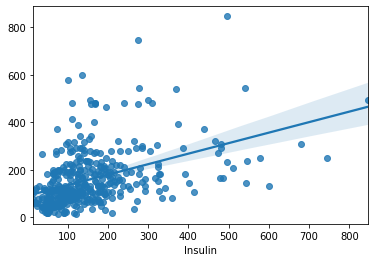

In [20]:
# regplot 통해 회귀선 구하기
# 200 미만의 값은 예측을 잘 했지만 200 이상의 값들은 실제값과 예측값의 차이가 큼
sns.regplot(y_train, y_predict)

In [21]:
# r2_score: 회귀가 잘 되었는지 측정, 1에 가까워야 잘 예측한 것
# 회귀값과 예측값 차이 큰 경우 있기 때문에 수치 낮게 나옴
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

-0.14429295602725567

얼추 비슷하게 예측했지만 안 맞는 구간이 있다는 것을 알 수 있습니다.대체로 Insulin이 800 넘는 것은 500 정도로 예측하고, 500 정도 되는 데이터를 800으로 잘못 예측했습니다.


c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


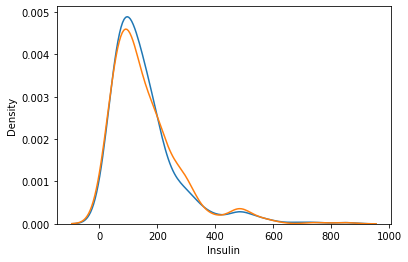

In [26]:
# 정답값과 예측값의 분포 그리기
# distplot에서 label 그릴때 hist는 False 
sns.distplot(y_train, hist=False, label='train')
sns.distplot(y_predict, hist=False, label='train')
print('얼추 비슷하게 예측했지만 안 맞는 구간이 있다는 것을 알 수 있습니다.'+
'대체로 Insulin이 800 넘는 것은 500 정도로 예측하고, 500 정도 되는 데이터를 800으로 잘못 예측했습니다.')

## 5.1.4 오차값 MAE, RMSE 구하기

### MAE
오차값의 절대값들의 평균(MAE)

In [29]:
error=abs(y_train - y_predict)
error.mean()

86.57106598984771

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

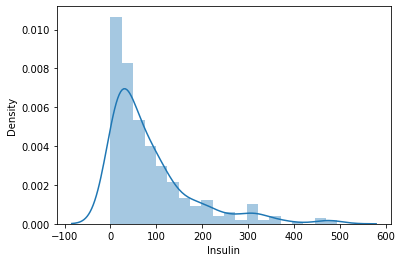

In [30]:
# 시각화
# 평균값에 많이 편향
sns.distplot(error)

In [31]:
# error 분포
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

### RMSE
: 실제값과 예측값이 얼 떨어져있는지 보여줌<br>
RMSE를 구하려면 오차에 제곱을 해주고, 평균을 구한 후에 루트를 씌움(표준편차 구하는 식과 유사)


In [34]:
np.sqrt(((y_train - y_predict)**2).mean())

126.89512636995443

## 5.1.5 회귀로 학습한 결과를 시각화 하기

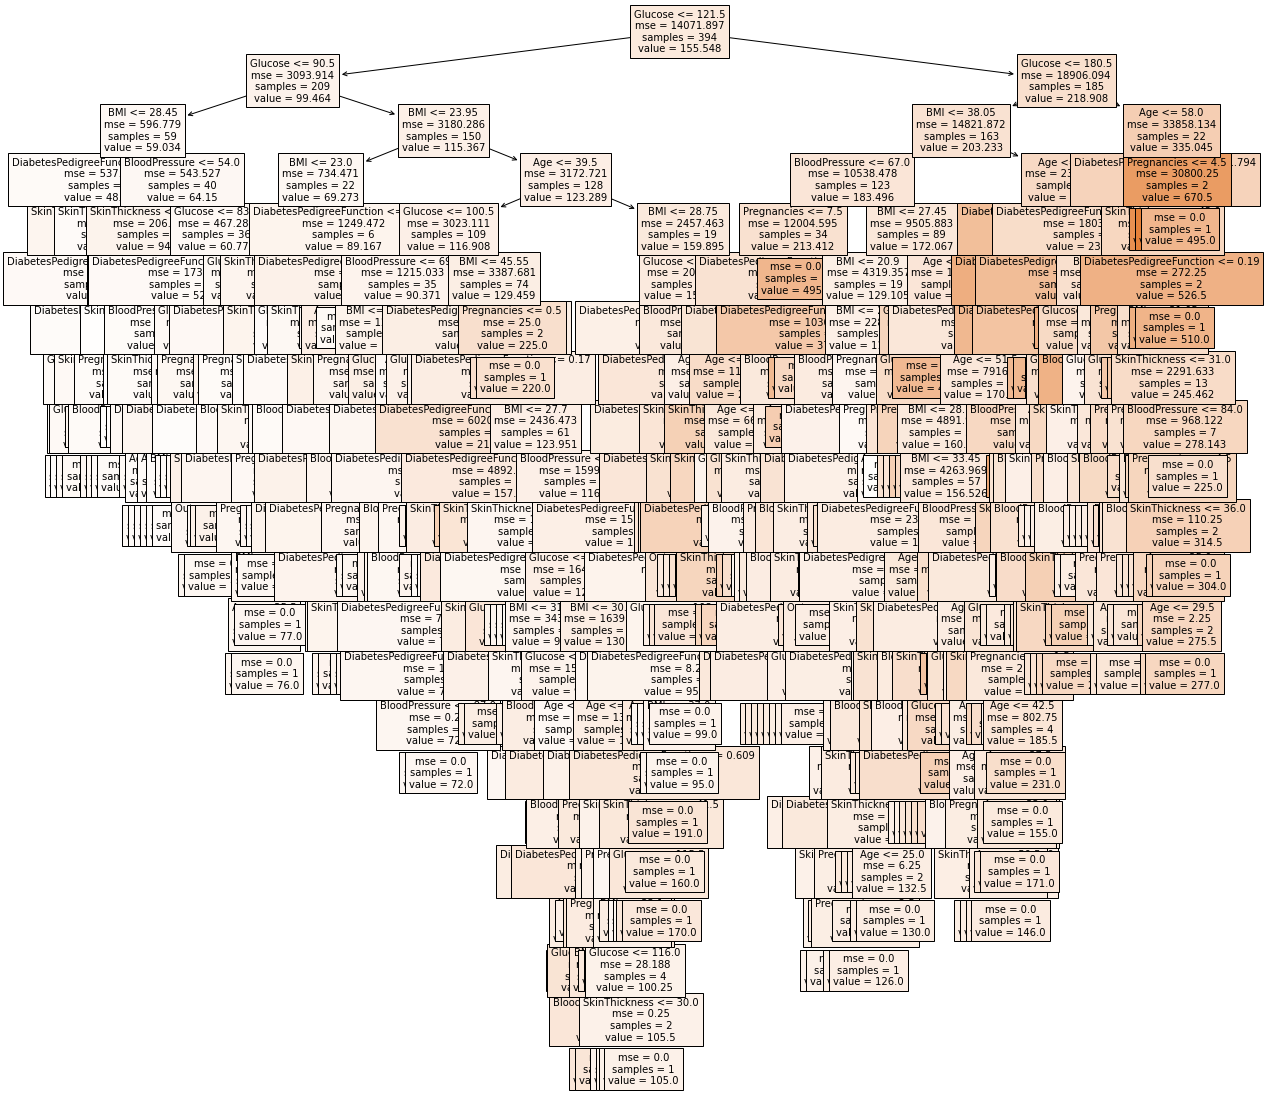

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

In [36]:
# 피쳐 중요도 추출
model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

<AxesSubplot:>

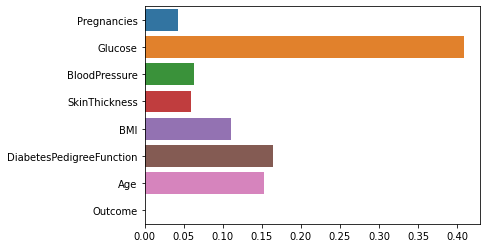

In [39]:
#피처의 중요도를 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)


### 예측

In [41]:
# Insulin이 0인 값을 예측했기 때문에 정답을 알 수 없음
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 145.,  36., 182.])

## 5.1.6 예측의 결과값 분석하기

In [42]:
train.groupby('Outcome')['Insulin'].agg(['mean','median'])

,mean,median
Outcome,,
0,130.287879,102.5
1,206.846154,169.5


In [49]:
# describe으로도 요약값을 확인
# 표준편차, max 값, 중앙값이 차이가 난다는 것 확인
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [50]:
test['Insulin']=y_test

In [51]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

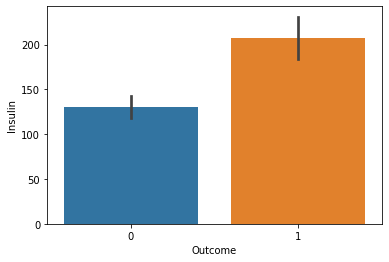

In [52]:
# Outcome 여부에 따른 Insulin의 평균값 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

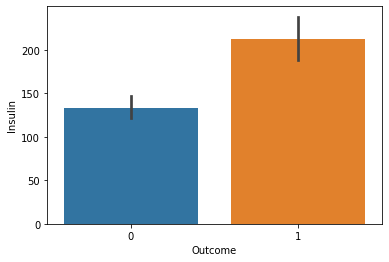

In [53]:
# 예측값을 시각화
sns.barplot(data=test, x="Outcome", y="Insulin")

## 5.1.7 이상치 제거하기
Insulin이 0인 값의 정답값을 모르기 때문에 회귀로 예측<br>
큰 값들 때문에 오버피팅이 되거나 좋은 예측을 하지 못할수도 있음

### EDA

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

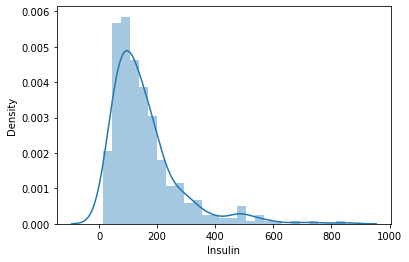

In [54]:
sns.distplot(train["Insulin"])

c:\deep\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

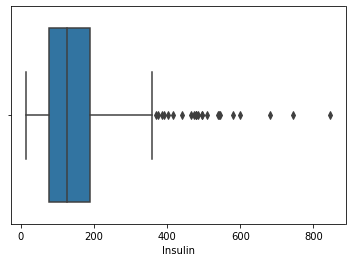

In [55]:
# IQR 값의 1.5배 넘어가는 값, 이상치 출력
sns.boxplot(train["Insulin"])

In [56]:
desc=train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [61]:
# IQR = 3IQR - 1IQR 
# OUT > 3IQR + (IQR * 1.5)
IQR=desc.loc['75%']-desc.loc['25%']
OUT=desc.loc['75%']+(IQR*1.5)

In [65]:
# 이상치 24개를 모두 제거하면 train 세트가 너무 적음
train[train["Insulin"] > OUT].shape

(24, 9)

In [74]:
# 600 미만인 값만 갖고 학습 진행, 4개를 줄여서 총 390개를 다시 학습
train=train[train['Insulin']<600]
train.shape

(390, 9)

### 다시 학습, 예측

### 학습, 예측에 사용할 컬럼

In [75]:
# insulin 제외 컬럼들(list형태) -> feature_names 변수
feature_names=test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [76]:
# Insulin: 예측해야 할 값으로 지정
label_name='Insulin'
label_name

'Insulin'

### 학습, 예측 데이터셋 나누기

In [77]:
X_train=train[feature_names]
X_train.shape

(390, 8)

In [78]:
y_train=train[label_name]
y_train.shape

(390,)

In [79]:
X_test=test[feature_names]
X_test.shape

(374, 8)

In [80]:
y_test=test[label_name]
y_test.shape

(374,)

## 5.1.3 크로스 밸리데이션으로 모델 검증하기

### 머신러닝 알고리즘 가져오기
* tree기반 알고리즘 사용 -> 좋은 성능
* Insulin데이터는 수치형 데이터 예측이므로 regression 사용

In [81]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [82]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Cross validation
학습세트의 오차 측정

In [83]:
# cv는 모의고사를 몇 번에 나눠서 풀 것인지를 지정
# 로그를 표시하기 위해 verbose 옵션을 지정
# cv가 많으면 많을수록 시간이 오래 걸리지만 정확도가 높아짐
# 장비가 8개이기 때문에 8 concurrent workers를 돌린다고 나타나며,
# 머신러닝을 돌리는 환경과 장비에 따라 다르게 나올 수 있음
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(model, X_train, y_train, cv=5, verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


In [84]:
# 정답 정확하게 맞춘 개수 알아보자 (300 개 중 3개, 매우 적음)
(y_predict==y_train).sum()

5

c:\deep\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

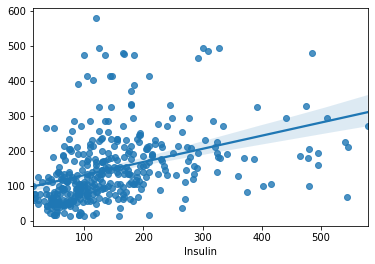

In [85]:
# regplot 통해 회귀선 구하기
sns.regplot(y_train, y_predict)

In [86]:
# r2_score: 회귀가 잘 되었는지 측정, 1에 가까워야 잘 예측한 것
# 회귀값과 예측값 차이 큰 경우 있기 때문에 수치 낮게 나옴
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

-0.1981991324875707

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

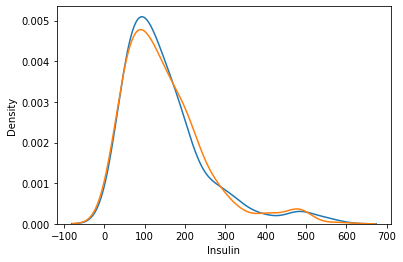

In [87]:
# 정답값과 예측값의 분포 그리기
# distplot에서 label 그릴때 hist는 False 
sns.distplot(y_train, hist=False, label='train')
sns.distplot(y_predict, hist=False, label='train')


## 5.1.4 오차값 MAE, RMSE 구하기

### MAE
오차값의 절대값들의 평균(MAE)

In [88]:
# 86 -> 이상치 제거: 77.55
error=abs(y_train - y_predict)
error.mean()

77.55128205128206

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

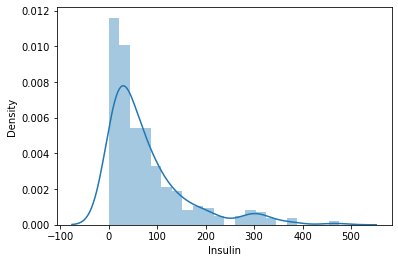

In [89]:
# 시각화
# 평균값에 많이 편향
sns.distplot(error)

In [90]:
# error 분포
error.describe()

count    390.000000
mean      77.551282
std       83.770044
min        0.000000
25%       21.250000
50%       48.500000
75%      100.750000
max      476.000000
Name: Insulin, dtype: float64

### RMSE
: 실제값과 예측값이 얼 떨어져있는지 보여줌<br>
RMSE를 구하려면 오차에 제곱을 해주고, 평균을 구한 후에 루트를 씌움(표준편차 구하는 식과 유사)


In [91]:
# 126.895 -> 이상치 제거(Insulin<600): 114.077
np.sqrt(((y_train - y_predict)**2).mean())

114.07729048819579

In [92]:
# OUT 미만인 값만 갖고 학습 진행, 총 370개를 다시 학습
train=train[train['Insulin']< OUT]
train.shape

(370, 9)

### 다시 학습, 예측

### 학습, 예측에 사용할 컬럼

In [93]:
# insulin 제외 컬럼들(list형태) -> feature_names 변수
feature_names=test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [94]:
# Insulin: 예측해야 할 값으로 지정
label_name='Insulin'
label_name

'Insulin'

### 학습, 예측 데이터셋 나누기

In [95]:
X_train=train[feature_names]
X_train.shape

(370, 8)

In [96]:
y_train=train[label_name]
y_train.shape

(370,)

In [97]:
X_test=test[feature_names]
X_test.shape

(374, 8)

In [98]:
y_test=test[label_name]
y_test.shape

(374,)

## 5.1.3 크로스 밸리데이션으로 모델 검증하기

### 머신러닝 알고리즘 가져오기
* tree기반 알고리즘 사용 -> 좋은 성능
* Insulin데이터는 수치형 데이터 예측이므로 regression 사용

In [99]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [100]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Cross validation
학습세트의 오차 측정

In [101]:
# cv는 모의고사를 몇 번에 나눠서 풀 것인지를 지정
# 로그를 표시하기 위해 verbose 옵션을 지정
# cv가 많으면 많을수록 시간이 오래 걸리지만 정확도가 높아짐
# 장비가 8개이기 때문에 8 concurrent workers를 돌린다고 나타나며,
# 머신러닝을 돌리는 환경과 장비에 따라 다르게 나올 수 있음
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(model, X_train, y_train, cv=5, verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


In [102]:
# 정답 정확하게 맞춘 개수 알아보자 (300 개 중 3개, 매우 적음)
(y_predict==y_train).sum()

7

c:\deep\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

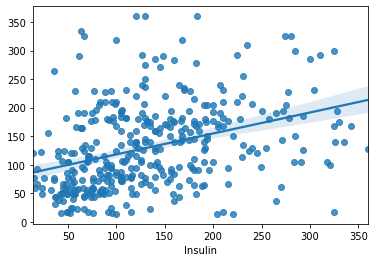

In [103]:
# regplot 통해 회귀선 구하기
# 선 근처에 데이터 모여있지 않고 퍼져 있음 -> 정확도 떨어짐
sns.regplot(y_train, y_predict)

In [104]:
# r2_score: 회귀가 잘 되었는지 측정, 1에 가까워야 잘 예측한 것
# 회귀값과 예측값 차이 큰 경우 있기 때문에 수치 낮게 나옴
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

-0.28551906710833275

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

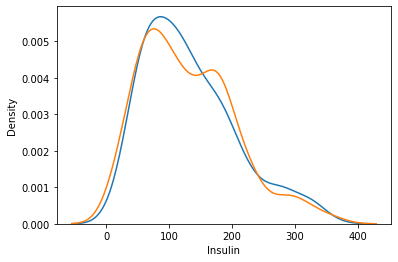

In [105]:
# 정답값과 예측값의 분포 그리기
# distplot에서 label 그릴때 hist는 False 
sns.distplot(y_train, hist=False, label='train')
sns.distplot(y_predict, hist=False, label='train')


## 5.1.4 오차값 MAE, RMSE 구하기

### MAE
오차값의 절대값들의 평균(MAE)

In [106]:
# 86 -> Insulin>600 제거: 77.55 -> 이상치 제거: 62.05
error=abs(y_train - y_predict)
error.mean()

62.056756756756755

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

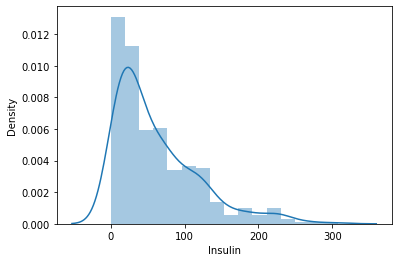

In [107]:
# 시각화
# 평균값에 많이 편향
sns.distplot(error)

In [108]:
# error 분포
error.describe()

count    370.000000
mean      62.056757
std       56.854443
min        0.000000
25%       19.250000
50%       42.500000
75%       89.750000
max      307.000000
Name: Insulin, dtype: float64

### RMSE
: 실제값과 예측값이 얼 떨어져있는지 보여줌<br>
RMSE를 구하려면 오차에 제곱을 해주고, 평균을 구한 후에 루트를 씌움(표준편차 구하는 식과 유사)


In [109]:
# 126.895 -> Insulin<600 제거: 114.077 -> 이상치 제거(OUT): 84.111
np.sqrt(((y_train - y_predict)**2).mean())

84.11142866717003

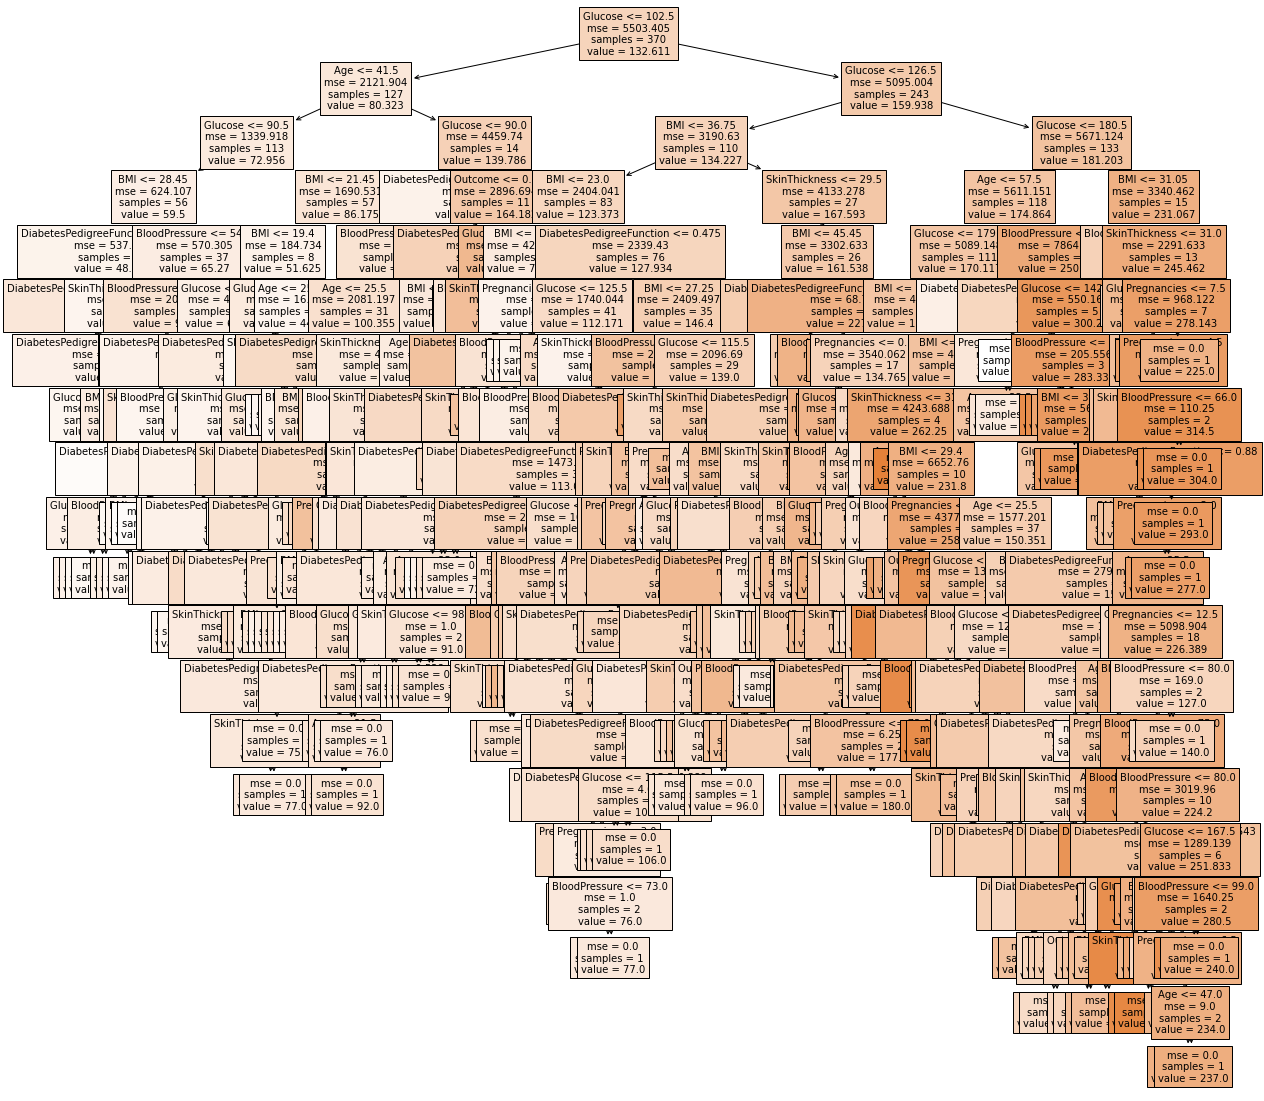

In [110]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

In [111]:
# 피쳐 중요도 추출
model.feature_importances_

array([0.04858345, 0.44656558, 0.07097731, 0.05588694, 0.16087336,
       0.09607089, 0.11025783, 0.01078464])

<AxesSubplot:>

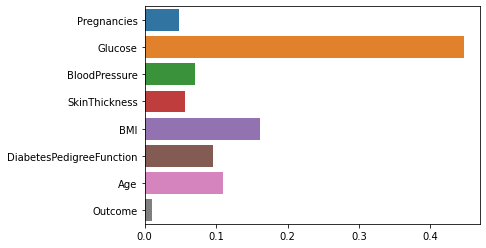

In [112]:
#피처의 중요도를 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)


### 예측

In [113]:
# Insulin이 0인 값을 예측했기 때문에 정답을 알 수 없음
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 130., 215., 165.])

### 예측의 결과값 분석하기

In [114]:
train.groupby('Outcome')['Insulin'].agg(['mean','median'])

,mean,median
Outcome,,
0,115.917323,100
1,169.163793,160


In [115]:
# describe으로도 요약값을 확인
# 표준편차, max 값, 중앙값이 차이가 난다는 것 확인
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [116]:
test['Insulin']=y_test

In [117]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,124.906780,80.878263,18.0,64.00,97.5,155.0,335.0
1,138.0,163.724638,83.718835,14.0,96.75,145.0,215.0,328.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

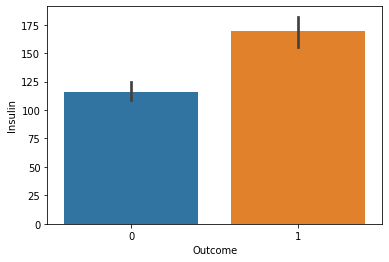

In [118]:
# Outcome 여부에 따른 Insulin의 평균값 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

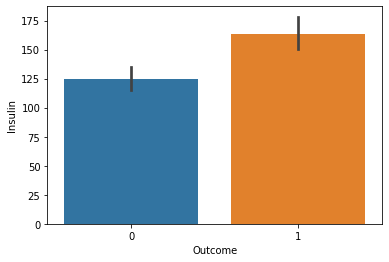

In [119]:
# 예측값을 시각화
sns.barplot(data=test, x="Outcome", y="Insulin")

## 5.1.8 RandomizedSearchCV 로 최적의 파라메터 값 찾기
tree가 아닌 알고리즘인 RandomizedSearchCV를 활용하여 예측<br>
이전 주피터 노트북을 duplicate(복제)하여 모델 학습

In [124]:
from sklearn.model_selection import RandomizedSearchCV

max_depth=np.random.randint(5,30,10)
max_features=np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth" : max_depth,
"max_features" : max_features}

regressor = RandomizedSearchCV(model,
param_distributions,
n_iter=10,
scoring=None,
cv=5,
verbose=2, random_state=42)

regressor.fit(X_train, y_train) # 전체적으로 5 * 10 = 50번 학습을 반복

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=26, max_features=0.9487533971677549; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.9487533971677549; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.9487533971677549; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.9487533971677549; total time=   0.0s
[CV] END ......max_depth=26, max_features=0.9487533971677549; total time=   0.0s
[CV] END .......max_depth=7, max_features=0.9487533971677549; total time=   0.0s
[CV] END .......max_depth=7, max_features=0.9487533971677549; total time=   0.0s
[CV] END .......max_depth=7, max_features=0.9487533971677549; total time=   0.0s
[CV] END .......max_depth=7, max_features=0.9487533971677549; total time=   0.0s
[CV] END .......max_depth=7, max_features=0.9487533971677549; total time=   0.0s
[CV] END .......max_depth=10, max_features=0.573527213108262; total time=   0.0s
[CV] END .......max_depth=10, max_features=0.573

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': array([ 9, 23, 16, 15, 17,  7, 16, 10, 26, 21]),
                                        'max_features': array([0.57352721, 0.86336728, 0.77926065, 0.9487534 , 0.36507603,
       0.62064613, 0.49520859, 0.94065156, 0.39800322, 0.91425246])},
                   random_state=42, verbose=2)

In [125]:
# 가장 성능이 좋은 parameter
regressor.best_params_

{'max_features': 0.9487533971677549, 'max_depth': 7}

In [126]:
# 가장 성능이 좋은 parameter가 들어간 모델의 모든 estimator를 출력
regressor.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features=0.9487533971677549,
                      random_state=42)

In [127]:
# 가장 좋은 스코어를 출력
regressor.best_score_

0.025151006803743003

In [128]:
# 딕셔너리 형태로 얼마나 시간이 걸렸는지, 스코어 등까지 출력
regressor.cv_results_

{'mean_fit_time': array([0.0058033 , 0.00479989, 0.00479975, 0.00466814, 0.00444369,
        0.00399976, 0.00519986, 0.00439925, 0.00399823, 0.00440063]),
 'std_fit_time': array([1.59767777e-03, 1.16577906e-03, 9.79355090e-04, 1.28639853e-03,
        1.00783568e-03, 1.10189629e-06, 9.80066745e-04, 8.00038549e-04,
        1.09366880e-03, 4.90154588e-04]),
 'mean_score_time': array([0.00319757, 0.00220008, 0.00220141, 0.00219984, 0.00279818,
        0.00280213, 0.00240154, 0.00220318, 0.00240088, 0.00300159]),
 'std_score_time': array([0.00098117, 0.00039973, 0.00074818, 0.00039938, 0.00074804,
        0.00074961, 0.00080183, 0.00040605, 0.00049027, 0.00063257]),
 'param_max_features': masked_array(data=[0.9487533971677549, 0.9487533971677549,
                    0.573527213108262, 0.6206461331711105,
                    0.36507602940066797, 0.9142524585865415,
                    0.7792606450693501, 0.573527213108262,
                    0.573527213108262, 0.573527213108262],
          

## 5.1.9 RandomizedSearchCV 로 최적의 모델 찾기

In [129]:
# 가장 좋은 파라미터는 우리가 넣은 파라미터 중에서 찾게 됨
# iteration이 크면 오래 걸림
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
                      RandomForestRegressor(random_state=42),
                      GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [131]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [137]:
# iteration을 돌린 값을 regressor에 담고 있기 때문에 regressor_best_params_를 append 시킴
# 모델 3개를 로그를 보여주면서 학습을 하여 result에 결과가 들어감
from sklearn.model_selection import RandomizedSearchCV

results = [ ]
for estimator in estimators:
    result = [ ]

    max_depth = np.random.randint(5, 30, 10) # 5부터 30 사이 10개 랜덤
    max_features = np.random.uniform(0.3, 1.0, 10) # 0.3 부터 1.0 사이 10개 랜덤

    param_distributions = {"max_depth" : max_depth,
"max_features" : max_features}

    regressor = RandomizedSearchCV(estimator,
        param_distributions,
        n_iter=10,
        scoring=None,
        cv=5,
        verbose=2, random_state=42)

    regressor.fit(X_train, y_train)

    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....max_depth=16, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=16, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=16, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=16, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=16, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=21, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=21, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=21, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=21, max_features=0.33404138067119304; total time=   0.0s
[CV] END .....max_depth=21, max_features=0.33404138067119304; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.3141280097650114; total time=   0.0s
[CV] END ......max_depth=18, max_features=0.3141

[CV] END ......max_depth=11, max_features=0.9763070738204664; total time=   0.1s
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=22, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=22, max_features=0.8995266816852439; total time=   0.0s
[CV] END ......max_depth=22, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=22, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=22, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=27, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=27, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=27, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=27, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=27, max_features=0.8995266816852439; total time=   0.1s
[CV] END ......max_depth=24, max_features=0.4772

In [154]:
# 위 for문에서 n_iter=100 으로 늘려 더 많이 돌려보고자 한다면 
# max_depth, max_features의 개수도 100으로 늘려주어야함

In [138]:
# r2_score에 의하면 RandomForest가 가장 좋은 성능
df_cv=pd.DataFrame(results)
df_cv.columns=['model', "params", "estimator", "score", "cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.6986152267604884, 'max_dept...","DecisionTreeRegressor(max_depth=7, max_feature...",0.055878,"{'mean_fit_time': [0.004923057556152344, 0.005..."
1,RandomForestRegressor,"{'max_features': 0.5997903832144158, 'max_dept...","(DecisionTreeRegressor(max_depth=6, max_featur...",0.344629,"{'mean_fit_time': [0.17221317291259766, 0.1680..."
2,GradientBoostingRegressor,"{'max_features': 0.4772835810161845, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.291820,"{'mean_fit_time': [0.16231718063354492, 0.1547..."


In [139]:
# 가장 성능 좋은 모델 출력
best_estimator=df_cv.loc[1, 'estimator']
best_estimator

RandomForestRegressor(max_depth=6, max_features=0.5997903832144158,
                      random_state=42)

In [140]:
# 가장 성능 좋은 모델 다시 학습
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=0.5997903832144158,
                      random_state=42)

In [142]:
# cross_validation으로 오차를 측정
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


array([ 56.37916451, 172.13736646, 101.49360914, 146.13395087,
       174.56857795])

c:\deep\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

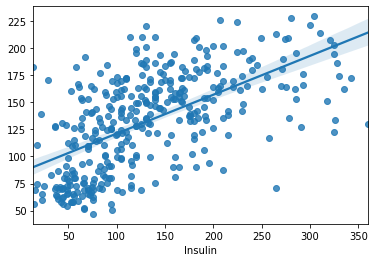

In [143]:
# 회귀선에 값이 가까워짐
sns.regplot(y_train, y_predict)

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

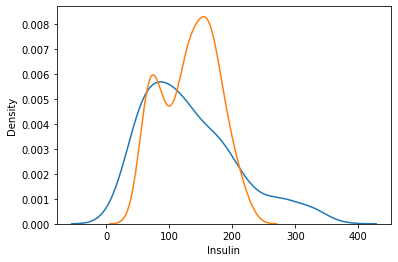

In [144]:
sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_predict, hist=False, label="predict")

In [145]:
# 가장 좋은 파라미터 찾았더니 가장 좋은 수치 얻음
error = abs(y_train - y_predict)
error.mean()

44.225334696789815

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

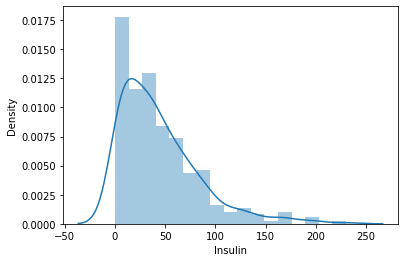

In [146]:
sns.distplot(error)

In [147]:
error.describe()

count    370.000000
mean      44.225335
std       39.776640
min        0.150301
25%       14.236732
50%       35.348911
75%       62.774764
max      229.900768
Name: Insulin, dtype: float64

In [148]:
# RMSE
np.sqrt(((y_train - y_predict) ** 2).mean())

59.445648883696606

In [149]:
best_estimator.feature_importances_

array([0.03496635, 0.45910626, 0.04677642, 0.08234426, 0.12720491,
       0.08295684, 0.10406206, 0.06258289])

<AxesSubplot:>

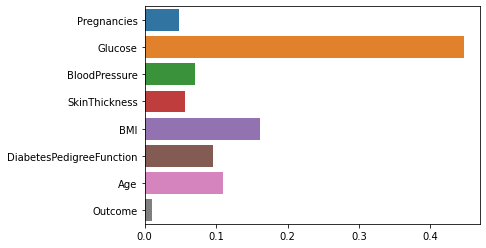

In [151]:
# 피처 중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

In [152]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [153]:
test['Insulin']=y_test

In [155]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,124.906780,80.878263,18.0,64.00,97.5,155.0,335.0
1,138.0,163.724638,83.718835,14.0,96.75,145.0,215.0,328.0


### 결과
* 평균, max 값의 차이가 큼
* 옵션 값을 더 자세히 설정한다면 좋은 성능 찾을 수 있음!

## 5.1.10 csv 파일로 예측결과 저장하기

In [156]:
df.loc[df['Insulin']==0,'Insulin']

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [157]:
# 두 series 데이터는 인덱스 번호와 행 길이가 같음
test['Insulin']

0      168.0
1       37.0
2      130.0
5      215.0
7      165.0
       ...  
761    328.0
762     94.0
764    325.0
766     22.0
767     88.0
Name: Insulin, Length: 374, dtype: float64

In [159]:
# 회귀로 예측된 값을 test데이터셋에 넣어줌
df.loc[df['Insulin']==0, 'Insulin'] = test['Insulin']

In [160]:
# 인덱스 빼고 저장하기 위해 index 옵션 = False
df.to_csv('data/diabetes_fill_insulin.csv', index=False)

In [161]:
pd.read_csv('data/diabetes_fill_insulin.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,168.0,33.6,0.627,50,1
1,1,85,66,29,37.0,26.6,0.351,31,0
2,8,183,64,0,130.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,325.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,22.0,30.1,0.349,47,1


## 5.2 회귀로 예측한 값을 분류에 사용하기
## 5.2.1 회귀로 예측한 인슐린을 분류에 사용하기
인슐린을 회귀로 예측한 데이터셋 이용

In [166]:
df=pd.read_csv('data/diabetes_feature.csv')
df.shape

(768, 16)

In [167]:
# Insulin 열에 회귀로 예측한 데이터 반영
df_insulin=pd.read_csv('data/diabetes_fill_insulin.csv')
df['Insulin']=df_insulin['Insulin']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,168.0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,37.0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,130.0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94.0,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168.0,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [168]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [169]:
# 학습할 컬럼
X=df[['Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high','Insulin']]
X.shape

(768, 8)

In [170]:
# 정답 컬럼
y=df['Outcome']
y.shape

(768,)

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [173]:
# train 세트의 문제와 정답의 데이터 수 확인
X_train.shape, y_train.shape

((614, 8), (614,))

In [174]:
# test 세트의 문제와 정답의 데이터 수 확인
X_test.shape, y_test.shape

((154, 8), (154,))

### 모델 학습

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators=[DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [185]:
max_depth=np.random.randint(2, 20, 10)
max_depth

array([17,  8, 12, 19, 12, 15,  8, 12, 13, 13])

In [186]:
max_features=np.random.uniform(0.3, 1.0, 10)
max_features

array([0.56940575, 0.78013647, 0.71637982, 0.42020063, 0.56370165,
       0.79804535, 0.82512954, 0.96067077, 0.30931238, 0.41921614])

In [188]:
results=[]
for estimator in estimators:
    result=[]
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [189]:
from sklearn.model_selection import RandomizedSearchCV

max_depth=np.random.randint(2, 20, 10)
max_features=np.random.uniform(0.3, 1.0, 10)

param_distributions={'max_depth': max_depth,
                   'max_features':max_features}

results=[]
for estimator in estimators:
    result=[]
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators']=np.random.randint(100,200,10)
    clf=RandomizedSearchCV(estimator,
                          param_distributions,
                          n_iter=100,
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=5,
                          verbose=2)
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)
results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[['DecisionTreeClassifier',
  {'max_features': 0.36179009992270544, 'max_depth': 5},
  0.7427162468345996,
  0.7532467532467533,
  {'mean_fit_time': array([0.00879993, 0.01460223, 0.01239991, 0.00920081, 0.00860109,
          0.00640006, 0.00659962, 0.00860038, 0.0080008 , 0.00560079,
          0.00680213, 0.00740175, 0.00740018, 0.00800047, 0.00840106,
          0.0067997 , 0.00620041, 0.00680056, 0.00740104, 0.00680113,
          0.00579925, 0.00600085, 0.00440073, 0.00660186, 0.00580201,
          0.00840144, 0.00740266, 0.00760264, 0.00820012, 0.00640197,
          0.00700188, 0.00820093, 0.00820041, 0.00860071, 0.00920062,
          0.00840163, 0.00839944, 0.00920162, 0.01120048, 0.00880122,
          0.00850468, 0.00840106, 0.01040225, 0.01020007, 0.00829749,
          0.0078023 , 0.00760202, 0.00740094, 0.0094008 , 0.00820165,
          0.00880203, 0.00800047, 0.00760188, 0.00900164, 0.00860224,
          0.00940018, 0.00860028, 0.01100283, 0.00880237, 0.00940084,
          0.00

In [191]:
# DecisionTreeClassifier의 성능이 가장 좋음
# 인슐린 수치를 회귀로 예측 시, 정확도가 더 떨어졌음
df=pd.DataFrame(results,
                columns=['estimator',"best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.36179009992270544, 'max_dep...",0.742716,0.753247,"{'mean_fit_time': [0.008799934387207031, 0.014..."
1,RandomForestClassifier,"{'n_estimators': 156, 'max_features': 0.339291...",0.778582,0.746753,"{'mean_fit_time': [0.600644588470459, 0.553454..."
2,GradientBoostingClassifier,"{'n_estimators': 153, 'max_features': 0.339291...",0.773651,0.746753,"{'mean_fit_time': [1.1957314491271973, 2.28692..."


In [192]:
pd.DataFrame(df.loc[1, 'cv_result']).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.581746,0.044790,0.033602,0.005083,156,0.339292,8,"{'n_estimators': 156, 'max_features': 0.339291...",0.756098,0.837398,0.747967,0.723577,0.827869,0.778582,0.045512,1
50,0.554666,0.054173,0.038998,0.006724,156,0.350326,8,"{'n_estimators': 156, 'max_features': 0.350326...",0.756098,0.837398,0.747967,0.723577,0.827869,0.778582,0.045512,1
54,0.529439,0.039080,0.034601,0.001020,160,0.36179,8,"{'n_estimators': 160, 'max_features': 0.361790...",0.756098,0.829268,0.747967,0.723577,0.827869,0.776956,0.043482,3
35,0.826719,0.027138,0.052206,0.005269,197,0.350326,6,"{'n_estimators': 197, 'max_features': 0.350326...",0.756098,0.829268,0.756098,0.731707,0.803279,0.775290,0.035590,4
96,0.695045,0.044942,0.041404,0.002155,190,0.613511,8,"{'n_estimators': 190, 'max_features': 0.613511...",0.780488,0.804878,0.764228,0.739837,0.778689,0.773624,0.021351,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.372828,0.018456,0.025801,0.001469,106,0.613511,5,"{'n_estimators': 106, 'max_features': 0.613511...",0.731707,0.804878,0.747967,0.715447,0.778689,0.755738,0.032257,96
92,0.486236,0.013587,0.034002,0.001789,148,0.339292,11,"{'n_estimators': 148, 'max_features': 0.339291...",0.731707,0.804878,0.747967,0.699187,0.786885,0.754125,0.037968,97
75,0.543682,0.023418,0.035011,0.001426,156,0.401507,11,"{'n_estimators': 156, 'max_features': 0.401507...",0.747967,0.813008,0.723577,0.707317,0.778689,0.754112,0.038033,98
14,0.729053,0.086501,0.037400,0.001203,190,0.402456,14,"{'n_estimators': 190, 'max_features': 0.402456...",0.739837,0.821138,0.723577,0.699187,0.770492,0.750846,0.042096,99


어떤 값 예측에 있어서 최적화된 방법은 없다는 의미로 '공짜 점심은 없다'라는 유명한 논문이 있음<br>
그러므로 상황에 따라 다양한 전처리 방법, 모델 시도 필요!

## 5.3 사이킷런으로 머신러닝 모델 만들기 전체 과정 정리
## 5.3.1 사이킷런으로 머신러닝 모델 만들기 전체 과정 정리
* 분류
* 회귀
* 언더피팅(과소적합) / 오버피팅(과대적합)
* 그리드서치, 랜덤서치
* 평가

![ML_process?](data/ML_process.png)
#### 데이터로드 > 전처리와 피처엔지니어링 > 모델링 > 예측 > 평가 의 과정으로 실습

![Decision_trees?](data/Decision_trees.png)
트리 계열의 알고리즘은 분류, 회귀 모두 사용 가능<br>
이런 알고리즘 -> CART (Classification And Regression Tree) 알고리즘

![classification?](data/classification.png)
![Regression?](data/Regression.png)


![clf?](data/clf.png)
#### 학습 > 예측 > 평가 과정
데이터를 가져와서 모델에 넣어주고 머신러닝 모델은 기출문제를 푸는 것과 같이<br>
문제와 정답을 보고 학습!<br>
학습한 모델 바탕의 새로운 데이터가 들어왔을 때 값을 예측<br>
그리고 머신러닝 모델이 예측을 잘했는지 평가

![overfitting_underfittig?](data/overfitting_underfittig.png)
#### 언더피팅(과소적합) & 오버피팅(과대적합)<br>
머신러닝 모델을 만들 때 학습모델에 오버피팅이 되면 예측의 정확도가 떨어지게 됨<br>
그래서 적절한 지점을 찾아주어야 예측의 성능을 높일 수가 있음<br>
여기에서의 적절한 지점을 찾기 위해 우리는 그리드서치와 랜덤서치를 사용했음<br>

![Randomized_parameter_search?](data/Randomized_parameter_search.png)
#### 그리드서치와 랜덤서치
그리드서치를 사용하면 격자안에 있는 값만 찾을 수 있음<br>
하지만 랜덤서치를 사용 시, 격자 안에 있는 최적의 파라미터 값을 찾을 때 <br>
여러 번 시도를 해볼수록 좋은 값을 찾을 수 있음